# **Lab 07: Introduction to Optimization via., Pyomo**

**By N. Hemachandra and R. Deval**

### **Objective:** In **Lab07** we will perform optimization using a Pyomo and various solvers in Python.

## **What is Pyomo?**

***Pyomo*** is a Python-based, *open-source optimization modeling language* with diverse optimization capabilities. It is a powerful tool for modeling and solving a wide range of optimization problems, including linear programming, integer programming, mixed-integer programming, nonlinear programming, and more. Pyomo provides a flexible and intuitive way to define optimization models and solve them using a variety of solvers.  


## **Key Features of Pyomo**

* **Model Components**: Pyomo allows you to define optimization models using high-level modeling components, such as variables, objectives, constraints, and sets. These components make it easy to formulate complex optimization problems.
* **Solver Interfaces**: Pyomo provides interfaces to various optimization solvers, both open-source and commercial. Some popular solvers that Pyomo can interface with include Gurobi, CPLEX, GLPK, and more. You can choose the solver that best suits your problem and availability.
* **Modeling Languages**: Pyomo supports both an algebraic modeling language (similar to mathematical notation) and a more programmatic modeling approach, giving users flexibility in how they define optimization models.
* **Extensions and Plugins**: Pyomo is highly extensible and allows users to create custom modeling components and extensions for specific problem domains. This makes it suitable for a wide range of applications.
* **Sensitivity Analysis**: Pyomo provides tools for performing sensitivity analysis, helping you understand how changes in problem parameters or constraints affect the optimal solution.
* **Parallel and Distributed Computing**: Pyomo can leverage parallel and distributed computing resources to solve large-scale optimization problems efficiently.
* **Integration with Data**: Pyomo can be integrated with data sources, databases, and external tools, making it suitable for optimization problems that involve dynamic or real-time data.

For more details [Click Here](https://pyomo.readthedocs.io/en/stable/)


## **Basic Optimization Problem**

Given below is an standard basic optimization problem which we will be solving using pyomo in this session.

$$\begin{equation}
\min_{x_1, x_2, y_1, y_2} 3x_1 + 4x_2 + 5y_1 + 6y_2 \\
\text{subject to} \\
\hspace{5em} C_1: 6x_1 + 5y_2 \leq 80 \\
\hspace{11em} C_2: 4x_1 + 2x_2 + 10y_1 - 3y_2 \geq 150 \\
\hspace{5em} y_1 \leq 100, y_2 \geq 20 \\
\end{equation}
$$

Below is a standard procedure (but not limited) to solve above optimization problem using Pyomo. \\
**Note**: *Carefully read all the instructions and ask TA(s) in case of any doubt(s)*.   

### **Solving Optimization problem using Pyomo**

1. By default pyomo library is not available in Google collab; therefore first task is to import pyomo library for exisiting session. In order to install pyomo use following command \\
`!pip install -q pyomo`


2. Once, pyomo is installed very next step is to call pyomo in session which can be performed as follows: \\
`from pyomo.environ import *` \\


In [ ]:
! pip install -q pyomo

In [ ]:
from pyomo.environ import *

3. In order to formulate optimization problem, pyomo requires declaring variables, defining bounds on variables, specifying constraints and objective function. Therefore, a standard arguments are executed for these problem features. \\
In the context of Pyomo, a "**ConcreteModel**" is a type of model that represents a specific instance of an optimization problem. It is called "concrete" because it defines the problem with actual numerical values for parameters, variables, and constraints. Concrete models are used when you have all the data and details required to define and solve a particular optimization problem. \\
`# creating a standard problem as model in pyomo using ConcreteModel()` \\
`model = ConcreteModel()`

In [ ]:
model = ConcreteModel()

4. Now various variables, objectives and constraints for problems are need to be defined. In order to do so, we need to update all information to exisiting `ConcreteModel()` which defined as `model` as: \\
`# declaring decision variable for system` \\
`model.x1 = Var(domain = Reals)` \\
`model.x2 = Var(domain = Reals)` \\
`model.y1 = Var(domain = Reals)` \\
`model.y2 = Var(domain = Reals)` \\
`# declaring constraints` \\
`model.constr1 = Constraint(expr = model.y1 <= 100)` \\
`model.constr2 = Constraint(expr = model.y2 >= 20)` \\
`model.constr3 = Constraint(expr = 6*model.x1 + 5*model.y2 <= 80)` \\
`model.constr4 = Constraint(expr = 4*model.x1 +  2*model.x2 + 10*model.y1 - 3*model.y2 >= 150)` \\
`# declaring objective function for optimization problem` \\
`model.cost = Objective(expr = 3*model.x1 + 4*model.x2 + 5*model.y1 + 6*model.y2, sense=minimize)`


**Note:** **`Var()`**, **`Constraint()`** and **`Objective()`**are predefined function used to declare decision variables, constraints and objective funtion respectively with each function taking arguments as input.
* `Var()` takes *domain* (or support) of that particular decision variable.
* `Constraint()` by default requires mathematical expression (as *expr*) for the constraints.
* `Objective()` takes mathematical expression (as *expr*) for objective function and the sense of minimisation or maximisation of objective (as *sense*)      

In [ ]:
model.x1 = Var(domain = Reals)
model.x2 = Var(domain = Reals)
model.y1 = Var(domain = Reals)
model.y2 = Var(domain = Reals)

# declaring constraints

model.constr1 = Constraint(expr = model.y1 <= 100)
model.constr2 = Constraint(expr = model.y2 >= 20)
model.constr3 = Constraint(expr = 6*model.x1 + 5*model.y2 <= 80)
model.constr4 = Constraint(expr = 4*model.x1 + 2*model.x2 + 10*model.y1 - 3*model.y2 >= 150)

# declaring objective function for optimization problem
model.cost = Objective(expr = 3*model.x1 + 4*model.x2 + 5*model.y1 + 6*model.y2, sense=minimize)

5. Once you have formulated optimization model as per above snip of code, you can visualize optimization model. \\
`model.pprint()` \\
Above argument will summarise your formulation.  

In [ ]:
model.pprint()

4 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 3*x1 + 4*x2 + 5*y1 + 6*y2

4 Constraint Declarations
    constr1 : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf :   y1 : 100.0 :   True
    constr2 : Size=1, Index=None, 

6. To solve above formulated model, we need to use a ***solver*** which are external software tools or libraries that you can use to solve mathematical optimization models defined within Pyomo. Pyomo provides a flexible interface for working with a variety of solvers, ***both open-source and commercial***, to find optimal solutions for optimization problems. Solvers in Pyomo can be categorized into two main types: linear and nonlinear solvers.


**Linear Solvers:**
* *GLPK (GNU Linear Programming Kit)*
* *CBC (Coin-OR Branch and Cut)*
* *Gurobi*

**Nonlinear Solvers:**
* *IPOPT (Interior Point Optimizer)*
* *SNOPT (Sparse Nonlinear Optimization)*
* *APOPT (Advanced Process Optimization)*

**Mixed-Integer Solvers:**
* *Gurobi*
* *CPLEX*
* *Bonmin*

**Global Optimization Solvers:**
* *BARON*


**Note:** Similar to Pyomo, solvers are not available by default in Google Collab. In order to use a particular solver, we need to install that particular solver to session.


Follow the below command (for our problem **we will be using GLPK solver**): \\

`#Below snip of code install the GLPK solver into current python session` \\
`!apt-get install -y -qq glpk-utils`


Once, you install solver you can direclty solve your optimization problem as

`SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()`

`SolverFactory()` is a class used to create instances of optimization solvers. It allows you to choose and instantiate a specific solver that will be used to solve a Pyomo optimization model. Pyomo provides an abstraction layer for interacting with various solvers, and SolverFactory is the gateway to this functionality.

🌴 **To Do:** Try to understand how the `SolverFactory()` exactly works.

In [1]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -943.333333333333
  Upper bound: -943.333333333333
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 4
  Number of nonzeros: 8
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0032012462615966797
# ----------------------------------------------------------
#   Solution Information
# -----------

Your `model` is now solved. To display solution follow below snip to code

`# display solution` \\
`print('\nCost = ', model.cost())` \\
`print('\nDecision Variables')` \\
`print('x1 = ', model.x1())` \\
`print('x2 = ', model.x2())` \\
`print('y1 = ', model.y1())` \\
`print('y2 = ', model.y2())` \\

`print('\nConstraints')` \\
`print('Constraint 1  = ', model.constr1())` \\
`print('Constraint 2  = ', model.constr2())` \\
`print('Constraint 3  = ', model.constr3())` \\
`print('Constraint 4  = ', model.constr4())` \\


In [2]:
print('\nCost = ', model.cost())
print('\nDecision Variables')
print('x1 = ', model.x1())
print('x2 = ', model.x2())
print('y1 = ', model.y1())
print('y2 = ', model.y2())

print('\nConstraints')
print('Constraint 1 = ', model.constr1())
print('Constraint 2 = ', model.constr2())
print('Constraint 3 = ', model.constr3())
print('Constraint 4 = ', model.constr4())

NameError: ignored

Resulting solution will be

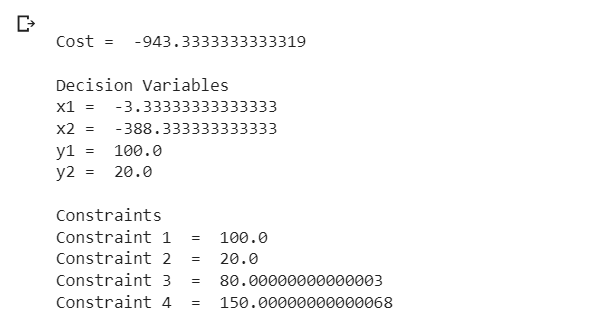

## 🛑 Excercise (In class activity)
(**Note**: You don't need to install pyomo and solver again and again from here on!!)

### **Problem 1**:

$$\begin{equation}
\min_{\{x_1, x_2, y_1, y_2\}} 6x_1 + 5x_2 + 4y_1 + 3y_2 \\
\text{subject to} \\
\hspace{5em} C_1: 5x_1 + 4y_2 \leq 90 \\
\hspace{11em} C_2: -x_1 + 6x_2 + 8y_1 - 4y_2 \geq 120 \\
\hspace{5em} y_1 \leq 150, y_2 \geq 30 \\
\end{equation}
$$

In [ ]:
model1 = ConcreteModel()

model1.x1 = Var(domain = Reals)
model1.x2 = Var(domain = Reals)
model1.y1 = Var(domain = Reals)
model1.y2 = Var(domain = Reals)

model1.constr1 = Constraint(expr = model1.y1 <= 150)
model1.constr2 = Constraint(expr = model1.y2 >= 30)
model1.constr3 = Constraint(expr = 5*model1.x1 + 4*model1.y2 <= 90)
model1.constr4 = Constraint(expr = -model1.x1 + 6*model1.x2 + 8*model1.y1 - 4*model1.y2 >= 120)

# declaring objective function for optimization problem
model1.cost = Objective(expr = 6*model1.x1 + 5*model1.x2 + 4*model1.y1 + 3*model1.y2, sense=minimize)

In [ ]:
model1.pprint()

4 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 6*x1 + 5*x2 + 4*y1 + 3*y2

4 Constraint Declarations
    constr1 : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf :   y1 : 150.0 :   True
    constr2 : Size=1, Index=None, 

In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model1).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 4
  Number of nonzeros: 8
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: unbounded
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.005529165267944336


### **Problem 2**:

$$\begin{equation}
\max_{\{x_1, x_2, x_3\}} x_1 + x_2 + x_3 \\
\text{subject to} \\
\hspace{5em} C_1: x_1 + x_2 \geq 12 \\
\hspace{6em} C_2: -4x_1 - 3x_3 \geq 20 \\
\hspace{6em} C_3: -x_2 + x_3 \leq -25 \\
\hspace{5em} x_1, x_2, x_3 \geq 0 \\
\end{equation}
$$

In [ ]:
model2 = ConcreteModel()

model2.x1 = Var(domain = Reals)
model2.x2 = Var(domain = Reals)
model2.x3 = Var(domain = Reals)


# declaring constraints

model2.constr1 = Constraint(expr = model2.x1 + model2.x2 >= 12)
model2.constr2 = Constraint(expr = -4*model2.x1 -3*model2.x3 >= 20)
model2.constr3 = Constraint(expr = -model2.x2 + model2.x3<= -25)
model2.constr4 = Constraint(expr = model2.x1 >=0)
model2.constr5 = Constraint(expr = model2.x2 >=0)
model2.constr6 = Constraint(expr = model2.x3 >=0)

# declaring objective function for optimization problem
model2.cost = Objective(expr = model2.x1 +model2.x2 + model2.x3, sense=maximize)

In [ ]:
model2.pprint()

3 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : x1 + x2 + x3

6 Constraint Declarations
    constr1 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  12.0 : x1 + x2 :  +Inf :   True
    constr2 : Size=1, Index=None, Active=True
        Key  : Lower : Body         : Upper : Active
        None :  20.0 : -4*x1 - 3*x3 :  +Inf :   True
    constr3 : Size=1, Index=None, Active=

In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model2).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 3
  Number of nonzeros: 9
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: infeasible
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.006504535675048828


### **Problem 3**:

$$\begin{equation}
\max_{\{x_1, x_2, x_3, x_4\}} 2x_1+4x_2 + 3x_3 + x_4 \\
\text{subject to} \\
\hspace{5em} C_1: 3x_1 + x_2 + x_3 + 4x_4 \leq 12 \\
\hspace{6em} C_2: x_1 - 3x_2 + 2x_3 + 3x_4 \leq 7 \\
\hspace{6em} C_3: 2x_1 + x_2 + 3x_3 - x_4 \leq 10 \\
\hspace{5em} x_1, x_2, x_3, x_4 \geq 0 \\
\end{equation}
$$

Given above (Problem 3) is an optimization formulation say, Primal (P). Solve this (P) using Pyomo and reformulate Dual (D) for above problem. Further, solve your formulated Dual (D) and perform an economic interpretation for relationship between Primal (P) and Dual (D).

In [ ]:
model3 = ConcreteModel()

model3.x1 = Var(domain = Reals)
model3.x2 = Var(domain = Reals)
model3.x3 = Var(domain = Reals)
model3.x4 = Var(domain = Reals)


# declaring constraints

model3.constr1 = Constraint(expr = 3*model3.x1 + model3.x2 +model3.x3 +4*model3.x4 <= 12)
model3.constr2 = Constraint(expr = model3.x1 -3*model3.x2 + 2*model3.x3 + 3* model3.x4 <= 7)
model3.constr3 = Constraint(expr = 2*model3.x1 + model3.x2 + 3*model3.x3 - model3.x4 <= 10)
model3.constr4 = Constraint(expr = model3.x1 >=0)
model3.constr5 = Constraint(expr = model3.x2 >=0)
model3.constr6 = Constraint(expr = model3.x3 >=0)
model3.constr7 = Constraint(expr = model3.x4 >=0)

# declaring objective function for optimization problem
model3.cost = Objective(expr = 2*model3.x1 + 4*model3.x2 + 3*model3.x3 + model3.x4, sense=maximize)

In [ ]:
model3.pprint()

4 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   0.0 :  None : False : False :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  10.4 :  None : False : False :  Reals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   0.0 :  None : False : False :  Reals
    x4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   0.4 :  None : False : False :  Reals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 2*x1 + 4*x2 + 3*x3 + x4

7 Constraint Declarations
    constr1 : Size=1, Index=None, Active=True
        Key  : Lower : Body                  : Upper : Active
        None :  -Inf : 3*x1 + x2 + x3 + 4*x4 :  12.0 :   True
  

In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model3).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 42.0
  Upper bound: 42.0
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 4
  Number of nonzeros: 16
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.005860328674316406
# ----------------------------------------------------------
#   Solution Information
# -------------------------------------

In [ ]:
print('\nCost = ', model3.cost())
print('\nDecision Variables')
print('x1 = ', model3.x1())
print('x2 = ', model3.x2())
print('x3 = ', model3.x3())
print('x4 = ', model3.x4())

print('\nConstraints')
print('Constraint 1 = ', model3.constr1())
print('Constraint 2 = ', model3.constr2())
print('Constraint 3 = ', model3.constr3())
print('Constraint 4 = ', model3.constr4())
print('Constraint 5 = ', model3.constr4())
print('Constraint 6 = ', model3.constr4())
print('Constraint 7 = ', model3.constr4())


Cost =  42.0

Decision Variables
x1 =  0.0
x2 =  10.4
x3 =  0.0
x4 =  0.4

Constraints
Constraint 1 =  12.0
Constraint 2 =  -30.000000000000004
Constraint 3 =  10.0
Constraint 4 =  0.0
Constraint 5 =  0.0
Constraint 6 =  0.0
Constraint 7 =  0.0


$$\begin{equation}
\min_{\{y_1, y_2, y_3\}} 12y_1+7y_2 + 10y_3\\
\text{subject to} \\
\hspace{5em} C_1: 3y_1 + y_2 + 2y_3 \geq 2 \\
\hspace{6em} C_2: y_1 - 3y_2 + y_3 \geq 4 \\
\hspace{6em} C_3: y_1 + 2y_2 + 3y_3 \geq 3 \\
\hspace{6em} C_3: 4y_1 + 3y_2 - y_3 \geq 1 \\
\hspace{5em} y_1, y_2, y_3, y_4 \geq 0 \\
\end{equation}
$$

In [ ]:
model4 = ConcreteModel()

model4.y1 = Var(domain = NonNegativeReals)
model4.y2 = Var(domain = NonNegativeReals)
model4.y3 = Var(domain = NonNegativeReals)


# declaring constraints

model4.constr1 = Constraint(expr = 3*model4.y1 +model4.y2 + 2*model4.y3 >= 2)
model4.constr2 = Constraint(expr =  model4.y1 -3 *model4.y2 + model4.y3 >= 4)
model4.constr3 = Constraint(expr = model4.y1 +2*model4.y2 + 3*model4.y3 >= 3)
model4.constr4 = Constraint(expr = 4*model4.y1 +3*model4.y2 - model4.y3 >= 1)


# declaring objective function for optimization problem
model4.cost = Objective(expr = 12*model4.y1 + 7*model4.y2 + 10*model4.y3, sense=minimize)

In [ ]:
model4.pprint()

3 Var Declarations
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 12*y1 + 7*y2 + 10*y3

4 Constraint Declarations
    constr1 : Size=1, Index=None, Active=True
        Key  : Lower : Body             : Upper : Active
        None :   2.0 : 3*y1 + y2 + 2*y3 :  +Inf :   True
    constr2 : Size=1, Index=None, Active=True
        Key  : Lower : Body           : Upper : Active
        None :   4.0 : y1 - 3*y2 + y

In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model4).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 42.0
  Upper bound: 42.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 3
  Number of nonzeros: 12
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0048389434814453125
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------

In [ ]:
print('\nCost = ', model4.cost())
print('\nDecision Variables')
print('y1 = ', model4.y1())
print('y2 = ', model4.y2())
print('y3 = ', model4.y3())


print('\nConstraints')
print('Constraint 1 = ', model4.constr1())
print('Constraint 2 = ', model4.constr2())
print('Constraint 3 = ', model4.constr3())
print('Constraint 4 = ', model4.constr4())



Cost =  42.0

Decision Variables
y1 =  1.0
y2 =  0.0
y3 =  3.0

Constraints
Constraint 1 =  9.0
Constraint 2 =  4.0
Constraint 3 =  10.0
Constraint 4 =  1.0
